# Exploring Relationships for World Happiness Report 2015-2016

### Contents

1. Importing Libraries and Data
2. Exploring Relationships
3. Answering Questions from Brief
4. Hypothesis

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensuring that created charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Checking that matplotlib is up-to-date
matplotlib.__version__

'3.5.2'

In [4]:
#Creating a path for this project
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achievement6\World Happiness'
print(path)

C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achievement6\World Happiness


In [5]:
#Importing clean dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','World_Happiness_2015-2022.csv'))

In [6]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_support', 'Life_Expectancy', 'Freedom',
       'Generosity', 'Corruption'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1230 non-null   object 
 1   Region           1230 non-null   object 
 2   Year             1230 non-null   int64  
 3   Happiness_Rank   1230 non-null   int64  
 4   Happiness_Score  1230 non-null   float64
 5   GDP_per_Capita   1230 non-null   float64
 6   Social_support   1230 non-null   float64
 7   Life_Expectancy  1230 non-null   float64
 8   Freedom          1230 non-null   float64
 9   Generosity       1230 non-null   float64
 10  Corruption       1229 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 105.8+ KB


### 2. Exploring Relationships

#### Creating subset dataset

In [8]:
# Create a subset excluding 'Country','Region', 'Year','Happiness_Rank'
df_sub = df[['Happiness_Score', 'GDP_per_Capita', 'Social_support', 'Life_Expectancy','Freedom','Generosity','Corruption']]

In [9]:
df_sub

,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...
1225,3.471,1.50300,0.81500,0.28000,0.57100,0.01200,0.10200
1226,3.268,0.78500,0.13300,0.46200,0.62100,0.18700,0.54400
1227,2.995,0.94700,0.69000,0.27000,0.32900,0.10600,0.10500
1228,2.955,1.39200,0.49800,0.63100,0.10300,0.08200,0.03400


#### Correlations

In [10]:
# Create a correlation matrix using pandas
df_sub.corr()

,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption
Happiness_Score,1.000000,0.742521,0.628478,0.727705,0.564985,0.091253,0.407241
GDP_per_Capita,0.742521,1.000000,0.490336,0.704555,0.404940,-0.117892,0.329331
Social_support,0.628478,0.490336,1.000000,0.622250,0.332167,0.007670,0.127802
Life_Expectancy,0.727705,0.704555,0.622250,1.000000,0.335558,-0.010353,0.274839
Freedom,0.564985,0.404940,0.332167,0.335558,1.000000,0.191417,0.441157
Generosity,0.091253,-0.117892,0.007670,-0.010353,0.191417,1.000000,0.244566
Corruption,0.407241,0.329331,0.127802,0.274839,0.441157,0.244566,1.000000


#### Create a correlation heatmap using seaborn:

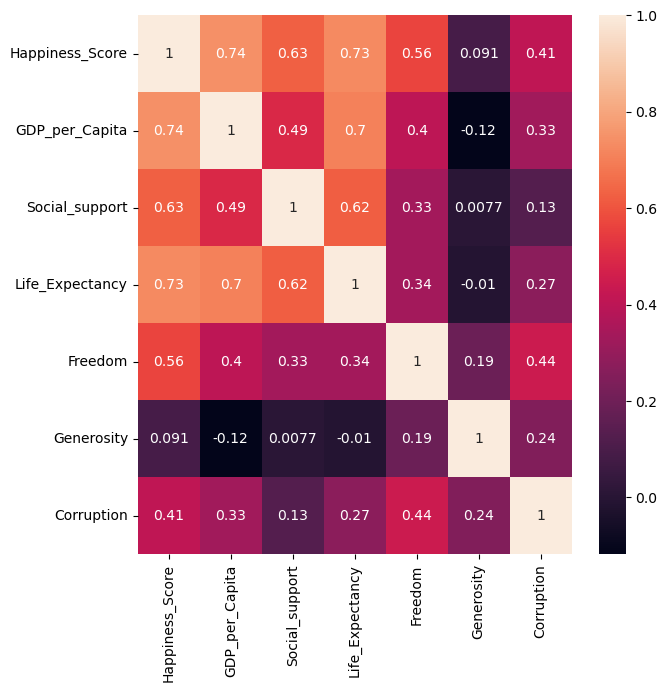

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
sns.heatmap(df_sub.corr(), annot = True, ax = ax) 
plt.savefig('Correlation_matrix.png', bbox_inches='tight', pad_inches=0.0)

A strong positive correlation exists between Happiness Score with GDP per capita, Life expectancy and social support. That makes sense, and it shows that economic prosperity, health and counting on relatives or friends when you need them are three main factors influencing a person's happiness. In addition, only a bit below, with a medium-strong correlation, freedom in life's decisions is also an essential factor for being 'happy'. On the other hand, it is surprising to see that generosity (e.g. Have you donated money to a charity in the past month?) had a weak relationship with the happiness score. In addition, it is also surprising to see that corruption (e.g. Is corruption widespread throughout the government or not?) presents a moderate positive relationship with happiness. 

Regarding the other variables, without taking the happiness score, we can observe a strong positive correlation between life expectancy with, economic prosperity and social support. Therefore, it seems that people can live longer having these two factors ensured. In addition, it is interesting to see that they are weak positive correlations between generosity, freedom and corruption. People donate more and feel that they can take more decisions when there is some government or business kind of corruption in the country.

#### Create a scatterplot using seaborn:

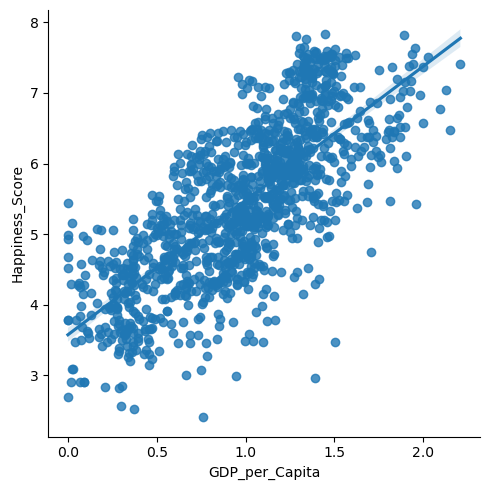

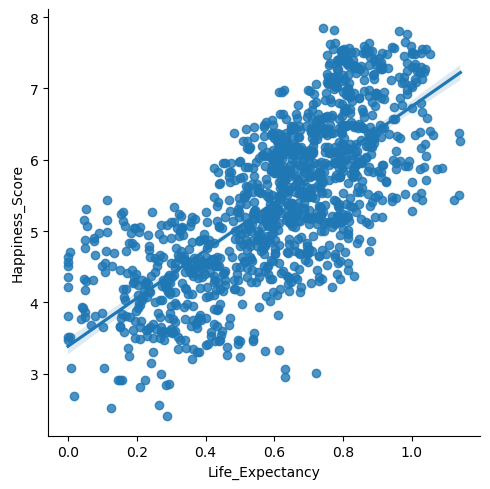

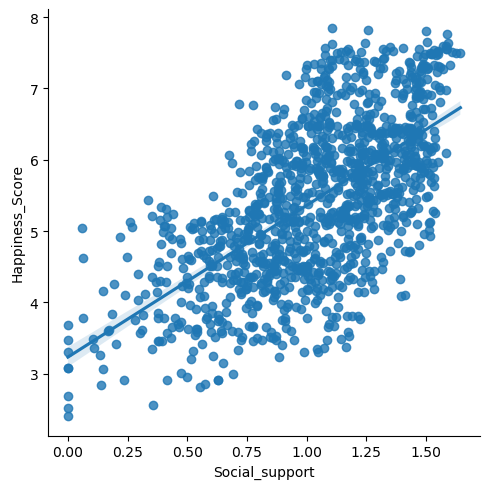

In [16]:
# Create a scatterplot for the 'GDP_per_Capita', 'Social_support' and 'Life_Expectancy' regarding the 'Happiness_Score' columns in seaborn
sns.lmplot(x = 'GDP_per_Capita', y = 'Happiness_Score', data = df_sub)
sns.lmplot(x = 'Life_Expectancy', y = 'Happiness_Score', data = df_sub)
sns.lmplot(x = 'Social_support', y = 'Happiness_Score', data = df_sub)

The correlation between Happiness score with GDP, life expectancy and social support is quite strong. Here we can see that GDP present the strongest influence on the happiness score, followed by life expectancy and social support, respectively. In the three charts, points do not deviate significantly from the mean. For the first two graphs, values are well distributed for all values. Only for social support, we see a skew being most of the points located after 0.5.

In [ ]:
# Create a scatterplot for the 'GDP_per_Capita', 'Social_support' and 'Life_Expectancy' columns in seaborn
sns.lmplot(x = 'GDP_per_Capita', y = 'Life_Expectancy', data = df_sub)
sns.lmplot(x = 'Social_support', y = 'Life_Expectancy', data = df_sub)

The correlation between life expectancy with GDP and social support is quite strong. For the first plot (GDP vs Life expectancy), the points deviate less regarding the mean (closer to the mean) in comparison to the second one (social support vs life expectancy); here, the data points are farther spread, being less open out only at the very high values. Nonetheless, as a result, the scatterplots show that GDP and social support greatly influence life expectancy.

#### Pair Plots:

In [ ]:
# Create a pair plot 
pairplt = sns.pairplot(df_sub)

I want to explore the variables GDP per capita, life expectancy, social support and happiness score further. I decided to take these columns because they strongly influence the happiness score (how happy a person is). In addition, I would like to analyse the effect of corruption on happiness because the correlation was medium positive.

In [ ]:
#exporting Pair Plot 
pairplt.figure.savefig((os.path.join(path, '04 Visualizations', 'pairplot.png')))

#### Categorical Plots:

In [ ]:
#Use a histagram to visualize distribution GDP per Capita
sns.histplot(df['GDP_per_Capita'], bins = 20, kde = True)

#### Create a new column called GPD_level

In [ ]:
df.loc[df['GDP_per_Capita'] < 0.5, 'GDP_level'] = 'Low'

In [ ]:
df.loc[(df['GDP_per_Capita'] >= 0.5) & (df['GDP_per_Capita'] < 1.5), 'GDP_level'] = 'Medium'

In [ ]:
df.loc[df['GDP_per_Capita'] >= 1.5, 'GDP_level'] = 'High'

In [ ]:
df['GDP_level'].value_counts(dropna = False)

In [ ]:
df.columns

#### Create a new column called Rank_level

In [ ]:
df['Happiness_Rank'].describe()

In [ ]:
df.loc[df['Happiness_Rank'] <= 32, 'Rank_level'] = '0-32'
df.loc[(df['Happiness_Rank'] > 32) & (df['Happiness_Rank'] <= 64), 'Rank_level'] = '32-64'
df.loc[(df['Happiness_Rank'] > 64) & (df['Happiness_Rank'] <= 96), 'Rank_level'] = '64-96'
df.loc[(df['Happiness_Rank'] > 96) & (df['Happiness_Rank'] <= 128), 'Rank_level'] = '96-128'
df.loc[df['Happiness_Rank'] > 128, 'Rank_level'] = '>128'

In [ ]:
df['Rank_level'].value_counts(dropna = False)

In [ ]:
# Create a categorical plot in seaborn using the GDP_level and Rank_level created above
sns.set(style="ticks")
GDP_levels = sns.catplot(x="Rank_level", y="GDP_per_Capita", hue="GDP_level", data=df)

The Rank level shows the country's rank according to the highest happiness score. Therefore, the higher the rank, the higher the happiness score. The chart above shows that the higher the GDP per capita, the higher the happiness rank (and vice-versa). This result shows the significant influence of the economic situation in defining an individual's happiness in this study.

In [ ]:
# fig = g.get_figure()
GDP_levels.savefig((os.path.join(path, '04 Visualizations', 'GDP_levels.png')))

### 3. Answering questions from the brief

#### What are the main factors influencing the happiness score over the years?

The main factors are GDP per capita, life expectancy and social support.

#### Is there a primary factor influencing the happiness score?

GPD per capita and life expectancy presented the higher correlation values.

#### Extra Questions
1. How have the happiness numbers changed over time? Which countries have increased the most? Which countries have decreased the most?
2. For the countries with the largest increase which factors changed the most?

### 4. Hypothesis

1. Countries with a high GDP per capita level present a higher happiness score
2. Countries with a high GDP per capita, life expectancy and social support present the highest happiness score
3. Over the years, GDP per capita, life expectancy and social support are the variables with more weight on the happiness score
4. There are no significant changes in the main variables before and after COVID